In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/twitter_data.csv')
df.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [3]:
print(df['sentiment'].nunique())
print(df['sentiment'].unique())
print(len(df))

13
['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']
30000


In [4]:
def generate_user_id(tweet):
    import random
    import string
    return ''.join(random.choices(string.hexdigits, k=2))

In [5]:
df['user_id'] = df['content'].apply(generate_user_id)
print(df.head())
print(df['user_id'].nunique())
print(f"Mean Tweets per User: {round(len(df) / df['user_id'].nunique(), 0)}")

    sentiment                                            content user_id
0       empty  @tiffanylue i know  i was listenin to bad habi...      56
1     sadness  Layin n bed with a headache  ughhhh...waitin o...      C6
2     sadness                Funeral ceremony...gloomy friday...      Eb
3  enthusiasm               wants to hang out with friends SOON!      C6
4     neutral  @dannycastillo We want to trade with someone w...      72
484
Mean Tweets per User: 62.0


In [6]:
for sentiment in df['sentiment'].unique():
    df[df['sentiment'] == sentiment].to_csv(f'data/sentiment/{sentiment}.csv', index=False)
    print(f'{sentiment}: {len(df[df["sentiment"] == sentiment])}')


empty: 659
sadness: 4828
enthusiasm: 522
neutral: 6340
worry: 7433
surprise: 1613
love: 2068
fun: 1088
hate: 1187
happiness: 2986
boredom: 157
relief: 1021
anger: 98


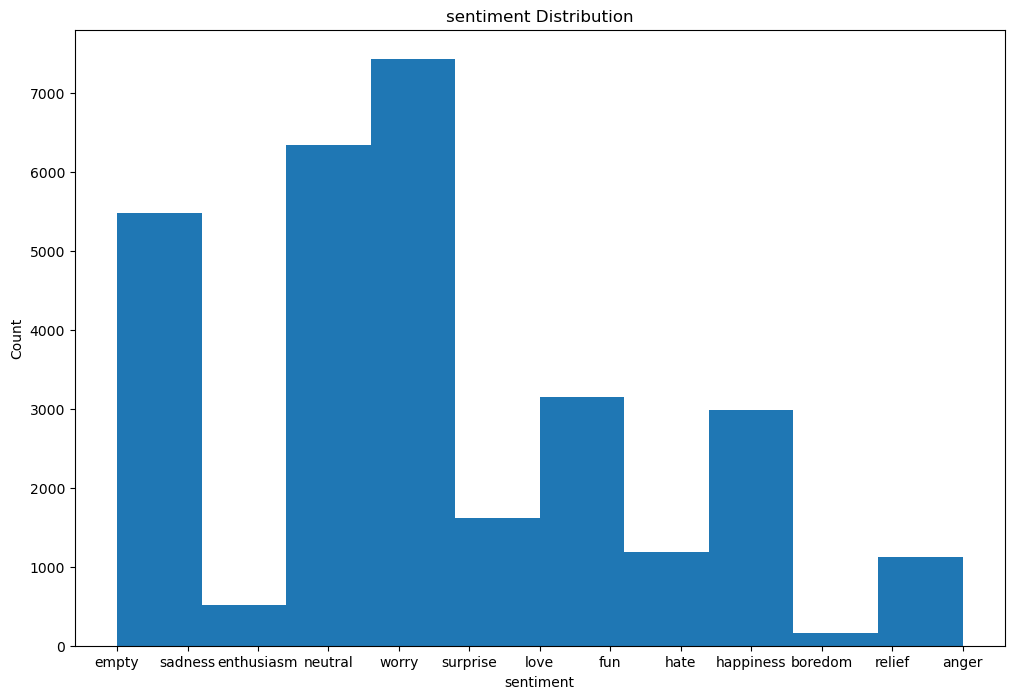

In [7]:
#plot sentiment distribution
def plot_sentiment_distribution(df, col_name='sentiment'):
    plt.figure(figsize=(12, 8))
    plt.hist(df[col_name])
    plt.title(f'{col_name} Distribution')
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.show()

plot_sentiment_distribution(df)

In [8]:
# group sentiments by positive, negative, and neutral from the original 13 sentiments
df['sentiment_simplified'] = df['sentiment'].replace(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry'], ['negative', 'negative', 'neutral', 'positive', 'positive', 'positive', 'negative', 'positive', 'neutral', 'positive', 'negative', 'positive', 'negative'])


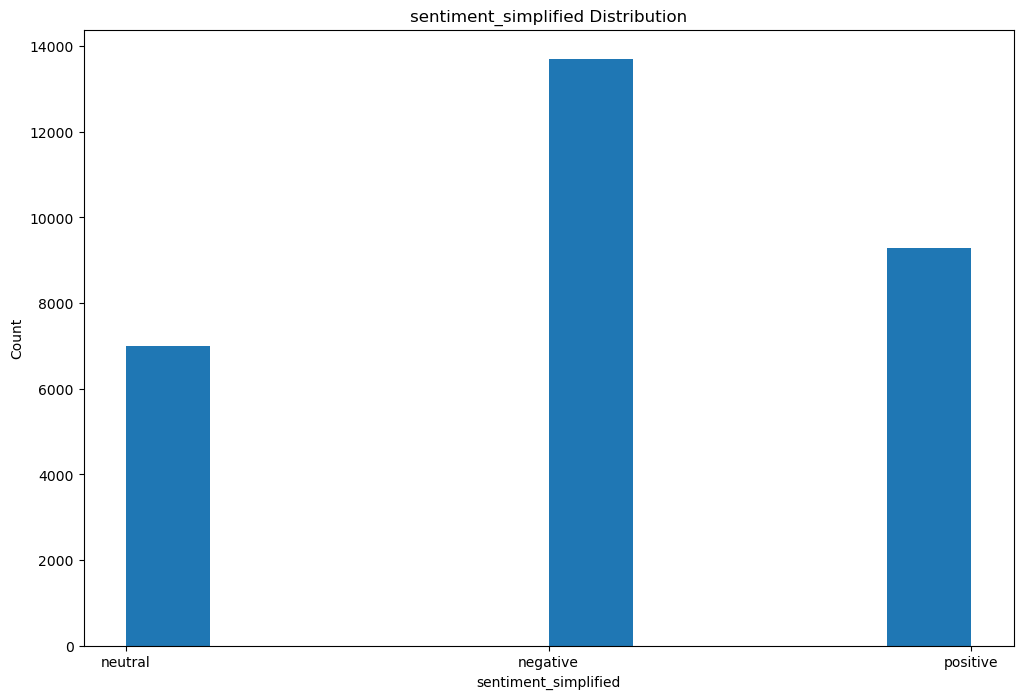

In [9]:
plot_sentiment_distribution(df, col_name='sentiment_simplified')

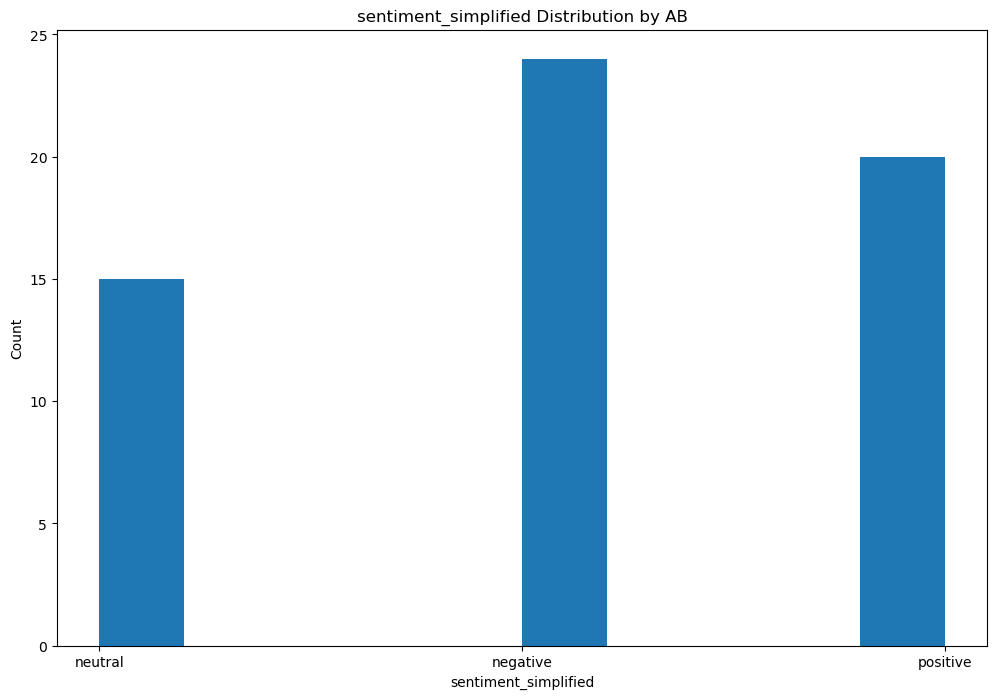

In [10]:
# plot sentiment distribution by user
def plot_sentiment_distribution_by_user(df, col_name='sentiment_simplified', user_id='AB'):
    plt.figure(figsize=(12, 8))
    plt.hist(df[df['user_id'] == user_id][col_name])
    plt.title(f'{col_name} Distribution by {user_id}')
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.show()

plot_sentiment_distribution_by_user(df, col_name='sentiment_simplified')

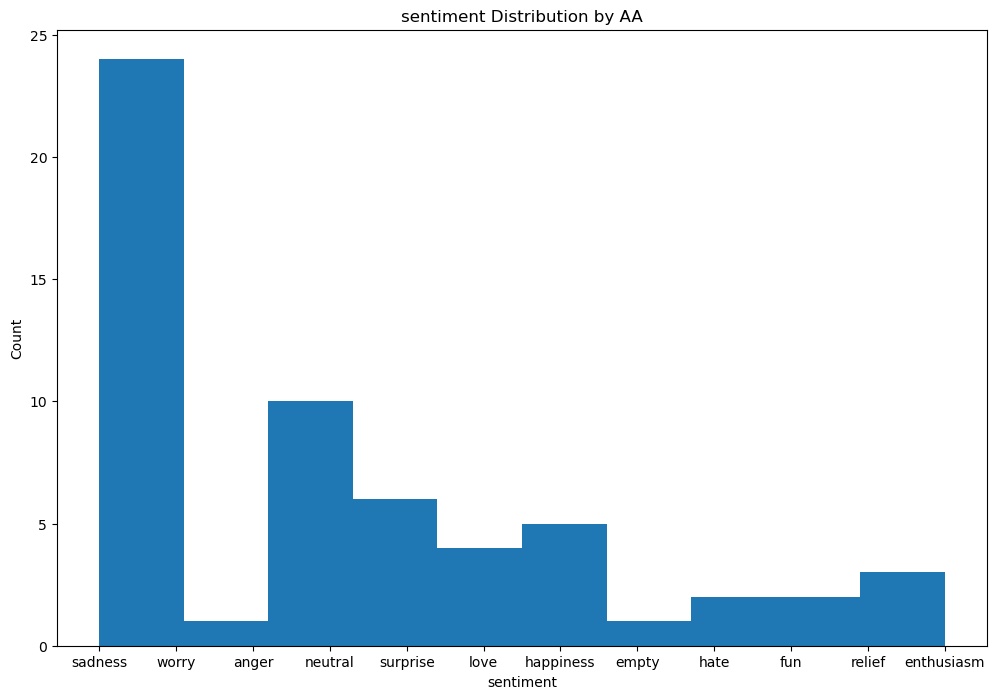

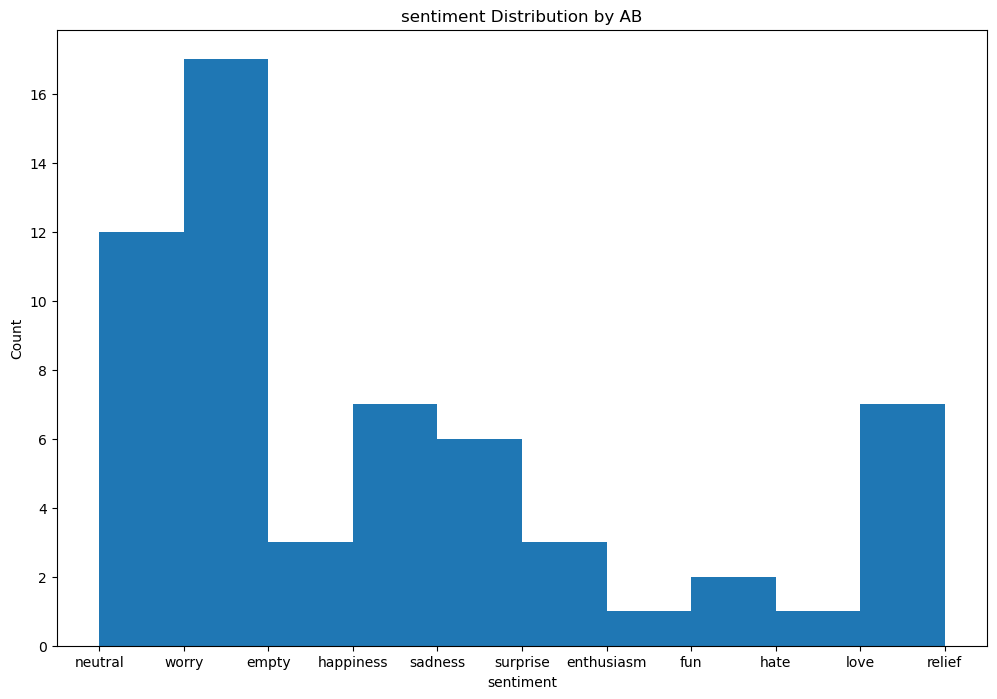

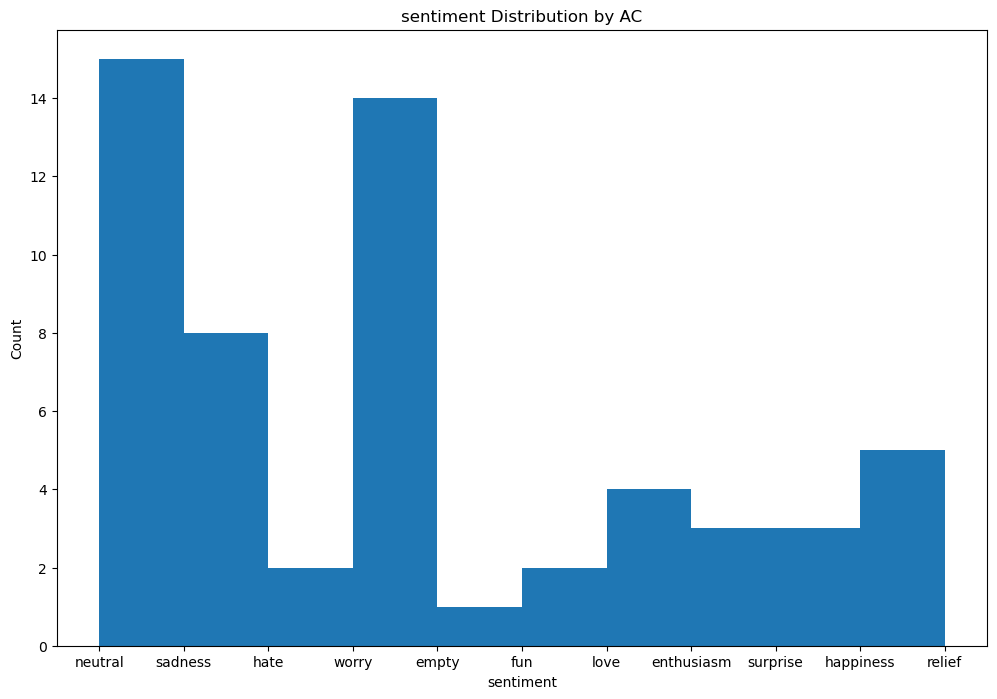

In [11]:
list_of_users = ['AA', 'AB', 'AC']
for user in list_of_users:
    plot_sentiment_distribution_by_user(df, user_id=user, col_name='sentiment')

In [12]:
df.head()

,sentiment,content,user_id,sentiment_simplified
0,empty,@tiffanylue i know i was listenin to bad habi...,56,neutral
1,sadness,Layin n bed with a headache ughhhh...waitin o...,C6,negative
2,sadness,Funeral ceremony...gloomy friday...,Eb,negative
3,enthusiasm,wants to hang out with friends SOON!,C6,positive
4,neutral,@dannycastillo We want to trade with someone w...,72,neutral


Text(0.5, 1.0, 'Word Frequency')

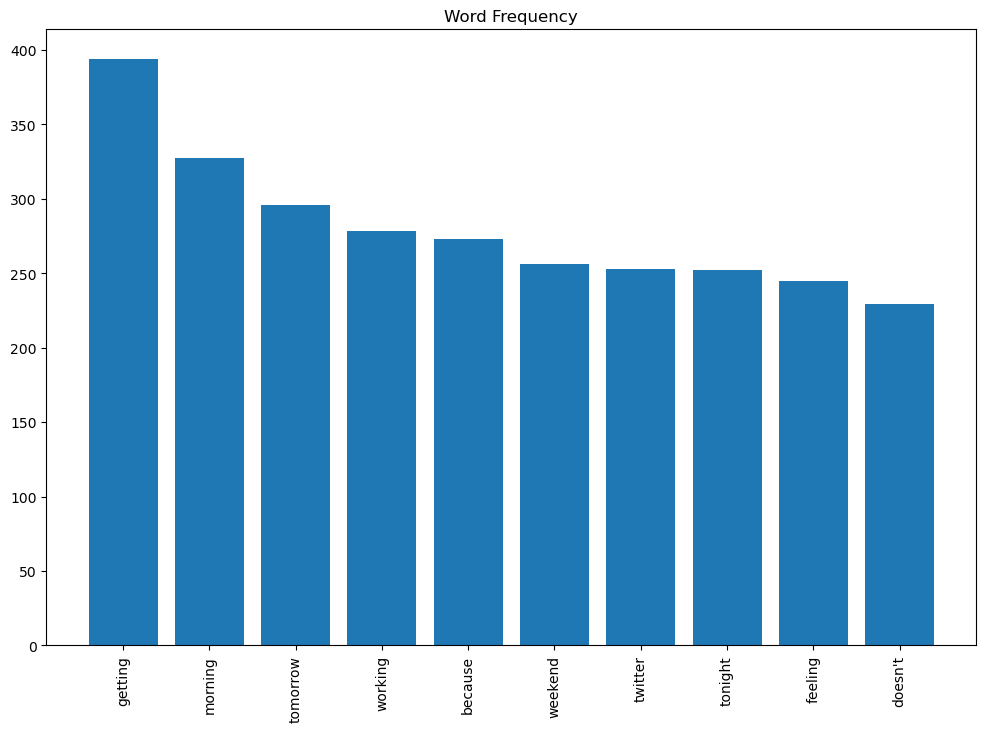

In [13]:
# generate a word frequency count and show the top 20 amd greater than 4 characters

from collections import Counter

def generate_word_frequency(df, col_name='content', top_n=10, min_char=6):
    word_freq = Counter(' '.join(df[col_name]).split())
    word_freq = {k: v for k, v in word_freq.items() if len(k) > min_char}
    return sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:top_n]

generate_word_frequency(df)
plt.figure(figsize=(12, 8))
plt.bar([i[0] for i in generate_word_frequency(df)], [i[1] for i in generate_word_frequency(df)])
plt.xticks(rotation=90)
plt.title('Word Frequency')

In [14]:
df.to_csv('data/twitter_data_edit.csv', index=False)